<a href="https://colab.research.google.com/github/akiabe/coursera-dl-tf-in-practice/blob/master/C3W3_IMDB_Subwords_8K_with_Multi_Layer_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf
import tensorflow_datasets as tfds

In [0]:
# Get the data
dataset, info = tfds.load('imdb_reviews/subwords8k', with_info=True, as_supervised=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

In [0]:
# Access the prelearned tokenizer which is trained on subwords
# tensorflow.org/datasets/api_docs/python/tfds/features/text/SubwordTextEncoder
tokenizer = info.features['text'].encoder

In [0]:
BUFFER_SIZE = 10000
BATCH_SIZE = 64

# Rondomly shuffles the elements of this dataset
train_dataset = train_dataset.shuffle(BUFFER_SIZE)

# Padding batches
train_dataset = train_dataset.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(train_dataset))
test_dataset = test_dataset.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(test_dataset))

In [17]:
 for sample_text, sample_label in train_dataset.take(1):
   print(sample_text)
   print('-' * 40)
   print(sample_label)

tf.Tensor(
[[ 404    1  108 ...    0    0    0]
 [ 691    2   71 ...    0    0    0]
 [ 156   42  641 ...    0    0    0]
 ...
 [ 156   14    9 ...    0    0    0]
 [ 789 6354   47 ...    0    0    0]
 [7452 1555 7968 ... 7984 7976  283]], shape=(64, 1021), dtype=int64)
----------------------------------------
tf.Tensor(
[0 1 0 1 0 1 0 0 1 1 1 1 0 0 1 0 1 1 0 1 1 1 0 1 0 1 0 1 1 0 1 1 0 0 1 0 0
 1 1 0 1 0 0 1 1 1 0 1 0 0 1 0 1 0 1 1 0 1 0 1 0 0 0 1], shape=(64,), dtype=int64)


In [18]:
# Build the multiple layer LSTM model
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(tokenizer.vocab_size, 64),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 64)          523840    
_________________________________________________________________
bidirectional_4 (Bidirection (None, None, 128)         66048     
_________________________________________________________________
bidirectional_5 (Bidirection (None, 64)                41216     
_________________________________________________________________
dense_4 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 65        
Total params: 635,329
Trainable params: 635,329
Non-trainable params: 0
_________________________________________________________________


In [19]:
# Training the model
NUM_EPOCHS = 10

history = model.fit(
    train_dataset,
    epochs=NUM_EPOCHS,
    validation_data=test_dataset
)

Epoch 1/10
391/391 [==============================] - 110s 282ms/step - loss: 0.6024 - accuracy: 0.6776 - val_loss: 0.5324 - val_accuracy: 0.7600
Epoch 2/10
391/391 [==============================] - 109s 279ms/step - loss: 0.3822 - accuracy: 0.8400 - val_loss: 0.4383 - val_accuracy: 0.8151
Epoch 3/10
391/391 [==============================] - 110s 281ms/step - loss: 0.4857 - accuracy: 0.7700 - val_loss: 0.5457 - val_accuracy: 0.7722
Epoch 4/10
391/391 [==============================] - 109s 280ms/step - loss: 0.3572 - accuracy: 0.8536 - val_loss: 0.4711 - val_accuracy: 0.8084
Epoch 5/10
391/391 [==============================] - 109s 280ms/step - loss: 0.2834 - accuracy: 0.8896 - val_loss: 0.4432 - val_accuracy: 0.8184
Epoch 6/10
391/391 [==============================] - 110s 281ms/step - loss: 0.2166 - accuracy: 0.9216 - val_loss: 0.4853 - val_accuracy: 0.8366
Epoch 7/10
391/391 [==============================] - 109s 279ms/step - loss: 0.1824 - accuracy: 0.9371 - val_loss: 0.5020 -

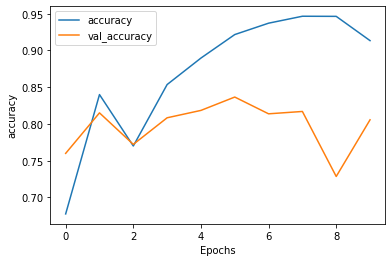

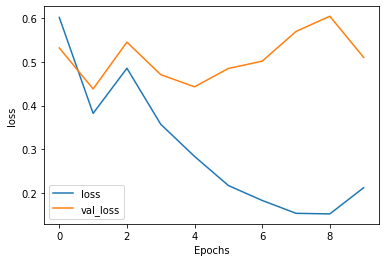

In [20]:
# Plot accuracy and loss
import matplotlib.pyplot as plt

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')